### Data

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
#dividir os training  testing img

train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:13<00:00, 739kB/s] 


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 153kB/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.12MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
#dividir os training  testing sets

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [5]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x, y = data[0][0], data[1][0]

print(y)

tensor(9)


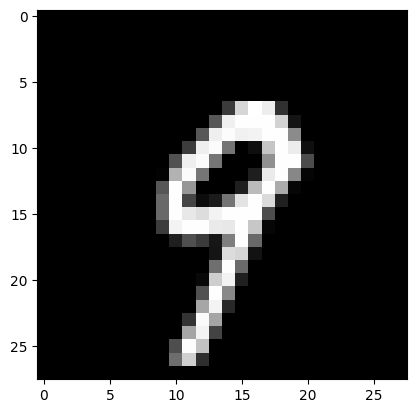

In [7]:
import matplotlib.pyplot as plt

#porque o tensor estava no formato 1, 28, 28 nos queremos so 28 X 28 ent view(28, 28)

plt.imshow(data[0][0].view(28,28), cmap = plt.cm.gray)

In [8]:
#verificar se esta balanced
#dicionario do formato numero : instances do numero

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [9]:
#distribuiçao dos numero em percentagens(esta bom o suficiente)

for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Neural Network

In [10]:
import torch.nn as nn
import torch.nn.functional as F

In [11]:
#inicializar nn.module
#fc1 -> input layer/ fc2 e fc3 -> processing layers/ fc4 -> output layer/

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    #                input v     v output
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

#funçao relU opera no output portanto n queremos q ela opere no ouput final

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)



net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
#-1 no view significa q o tamanho n é definido
#primeira vez a passar info na NN n significa muito por agora

x = torch.rand((28, 28))
x = x.view(-1, 28*28)

output = net(x)
output

tensor([[-2.3354, -2.3329, -2.1668, -2.2604, -2.2539, -2.3590, -2.3114, -2.3125,
         -2.4074, -2.3058]], grad_fn=<LogSoftmaxBackward0>)

treinar

dar print a loss ao longo de 3 epochs selecionados(baixou uhuu)

In [13]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    #X é os valores dos pixeis q constituem 1 numero, y é o respetivo numero
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0705, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)


print da accuracy do modelo

In [14]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx,i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct+=1
      total += 1

print("accuracy: ", round(correct/total, 3))

accuracy:  0.973


testar casos especificos

<function matplotlib.pyplot.show(close=None, block=None)>

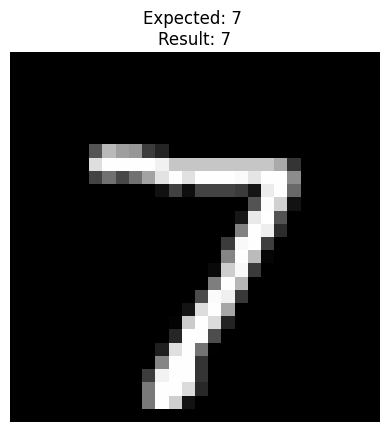

In [46]:
elem = 0
plt.imshow(X[elem].view(28, 28), cmap = plt.cm.gray)
plt.title(f"Expected: {y[elem]} \nResult: {torch.argmax(net(X[elem].view(-1, 28*28)))}")
plt.axis("off")
plt.show

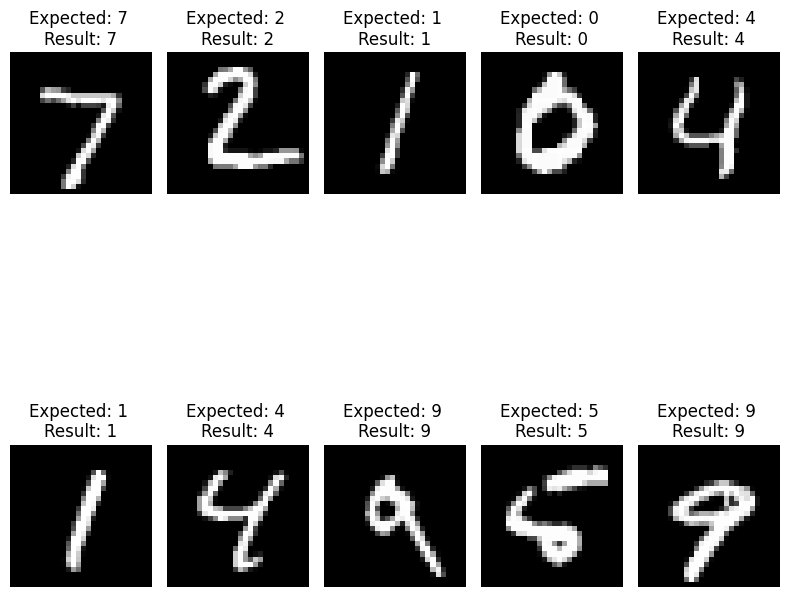

In [47]:
import PIL

plt.figure(figsize=(8, 10))

for data in testset:
    X, y = data

    for num, x in enumerate(X):
        plt.subplot(2, 5, num + 1)
        plt.title(f"Expected: {y[num]} \nResult: {torch.argmax(net(x.view(-1, 28*28)))}")
        plt.axis('off')
        plt.imshow(x.view(28, 28), cmap=plt.cm.gray)

    plt.tight_layout()
    plt.show()
    break


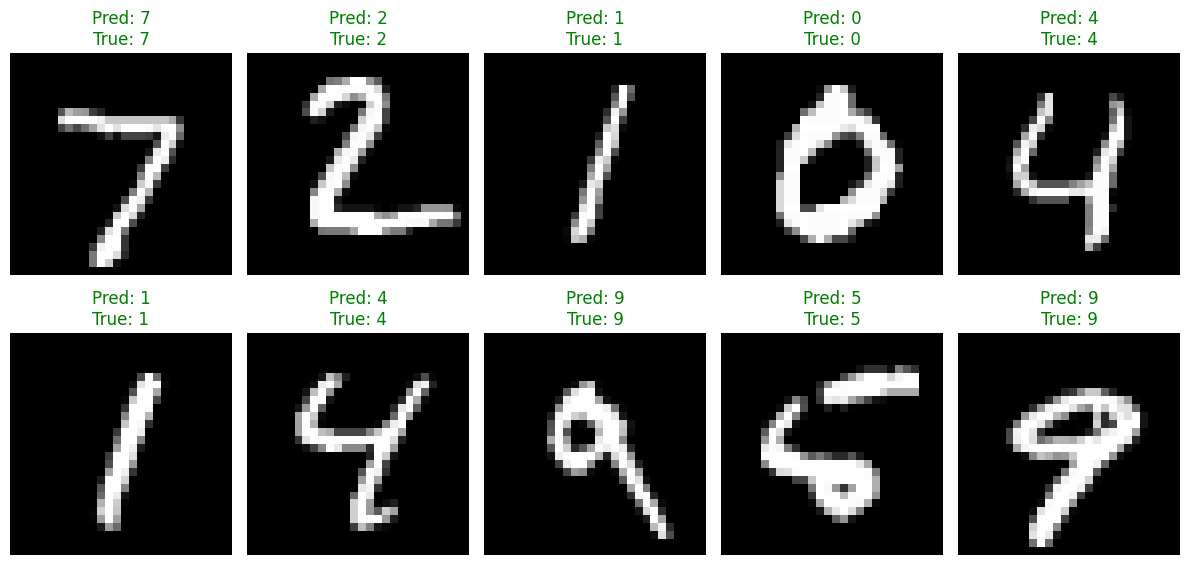

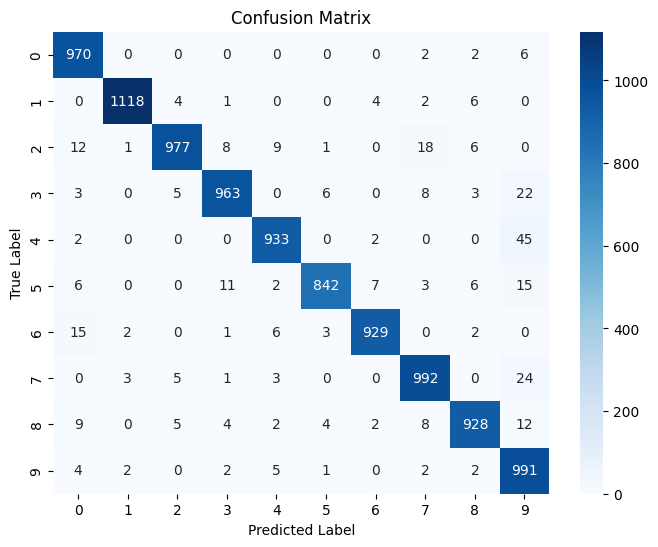

Epoch 1: Loss = 0.0798, Accuracy = 0.9752
Epoch 2: Loss = 0.0656, Accuracy = 0.9795
Epoch 3: Loss = 0.0556, Accuracy = 0.9828


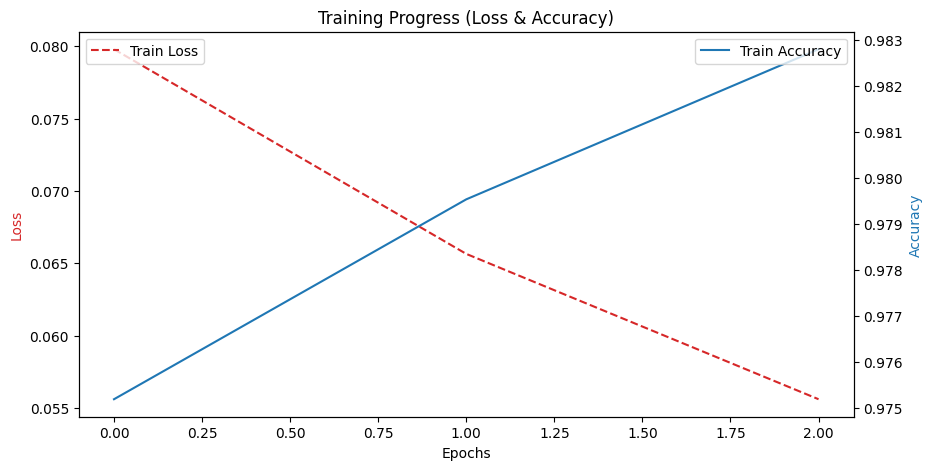

In [49]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Plot sample predictions
def plot_predictions(model, test_loader, num_samples=10):
    model.eval()
    fig, axes = plt.subplots(2, num_samples // 2, figsize=(12, 6))
    axes = axes.flatten()

    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    outputs = model(images.view(-1, 28*28))
    predictions = torch.argmax(outputs, dim=1)

    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(images[i].view(28, 28), cmap="gray")
        color = "green" if predictions[i] == labels[i] else "red"
        ax.set_title(f"Pred: {predictions[i].item()}\nTrue: {labels[i].item()}", color=color)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(model, test_loader):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.view(-1, 28*28))
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Plot training loss
train_losses, train_acc = [], []

def train_model(model, train_loader, optimizer, epochs=3):
    for epoch in range(epochs):
        correct = 0
        total = 0
        epoch_loss = 0

        for data in train_loader:
            X, y = data
            model.zero_grad()
            output = model(X.view(-1, 28*28))
            loss = torch.nn.functional.nll_loss(output, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            preds = torch.argmax(output, dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

        train_losses.append(epoch_loss / len(train_loader))
        train_acc.append(correct / total)
        print(f"Epoch {epoch+1}: Loss = {train_losses[-1]:.4f}, Accuracy = {train_acc[-1]:.4f}")

# training loss and accuracy
def plot_training_progress():
    epochs = len(train_losses)

    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss", color="tab:red")
    ax1.plot(range(epochs), train_losses, label="Train Loss", color="tab:red", linestyle="--")
    ax1.legend(loc="upper left")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Accuracy", color="tab:blue")
    ax2.plot(range(epochs), train_acc, label="Train Accuracy", color="tab:blue")
    ax2.legend(loc="upper right")

    plt.title("Training Progress (Loss & Accuracy)")
    plt.show()

plot_predictions(net, testset)
plot_confusion_matrix(net, testset)

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
train_model(net, trainset, optimizer, epochs=3)
plot_training_progress()
